<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 13</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

In [1]:
using PyPlot;

In [2]:
## Método de Euler independiente de la dimensión.

function euler(f,listt,x0)
     x = x0
     h = listt[2]-listt[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(listt)
        t = listt[i]
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end;

In [3]:
## Método RK4 independiente de la dimensión.

function RK_4(f,listt,x0)
     x = x0
     l = (listt[2]-listt[1])/2.0
     listx=[]
     push!(listx,x)
     for i in 2:length(listt)
        t = listt[i]
        k1 = f(x,t)
        k2 = f(x+l*k1,t+l)
        k3 = f(x+l*k2,t+l)
        k4 = f(x+2l*k3,t+2l)
        x += (l/3.0)*(k1+2k2+2k3+k4)
        push!(listx,x) 
     end
     return listx
end;

## Ejercicio 1

Se resuelve el oscilador armónico amortiguado:

$$m\ddot{x}=-kx-b\dot{x},\:x(0)=1\:\mathrm{y}\:\dot{x}(0)=0,$$

con el método de Euler y el método RK4 y se comparan ($m=k=b=1$).

In [4]:
f(x,t)=[x[2],-x[1]-x[2]];  # m=k=b=1.

In [5]:
listtE=0:0.1:20;             # Paso h=0.1
vecE=euler(f,listtE,[1,0]);

In [6]:
listxE1=map(x->x[1],vecE);
listxE2=map(x->x[2],vecE);

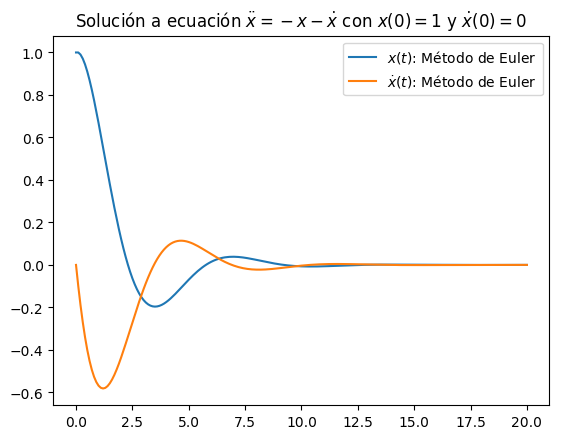

In [7]:
plot(listtE,listxE1,label=L"$x(t)$: Método de Euler")
plot(listtE,listxE2,label=L"$\dot{x}(t)$: Método de Euler");
title(L"Solución a ecuación $\ddot{x}=-x-\dot{x}$ con $x(0)=1$ y $\dot{x}(0)=0$")
legend()
show();

In [8]:
listtRK=0:0.1:20;             # Paso h=0.1
vecRK=RK_4(f,listtRK,[1,0]);

In [9]:
listxRK1=map(x->x[1],vecRK);
listxRK2=map(x->x[2],vecRK);

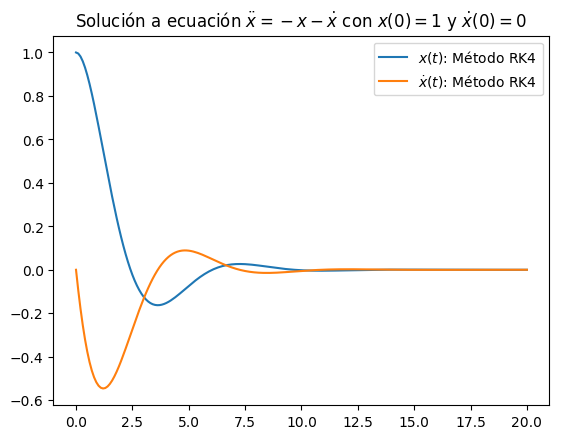

In [10]:
plot(listtRK,listxRK1,label=L"$x(t)$: Método RK4")
plot(listtRK,listxRK2,label=L"$\dot{x}(t)$: Método RK4");
title(L"Solución a ecuación $\ddot{x}=-x-\dot{x}$ con $x(0)=1$ y $\dot{x}(0)=0$")
legend()
show();

El espacio fase para el método de Euler:

In [11]:
listtEE=0:0.1:20;             # Paso h=0.01
vecEE=euler(f,listtEE,[1,0]);
listxEE1=map(x->x[1],vecEE);
listxEE2=map(x->x[2],vecEE);

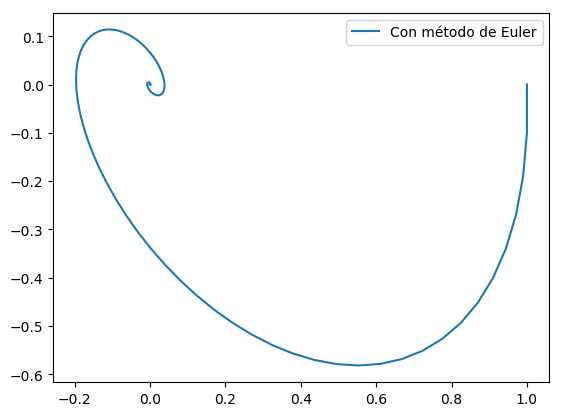

In [12]:
plot(listxEE1,listxEE2,label="Con método de Euler");
legend()
show();

El espacio fase para el método RK4:

In [13]:
listtRK4=0:0.1:20;             # Paso h=0.01
vecRK4=RK_4(f,listtRK4,[1,0]);
listxRK41=map(x->x[1],vecRK4);
listxRK42=map(x->x[2],vecRK4);

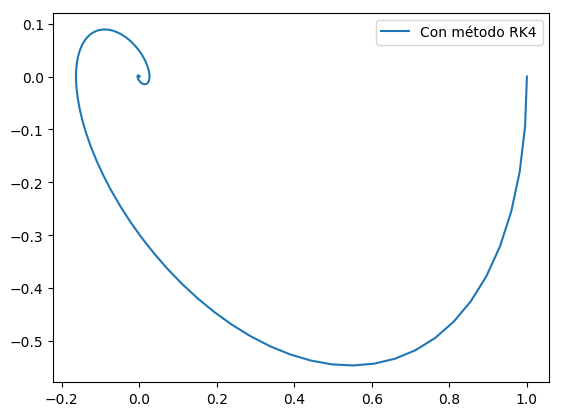

In [14]:
plot(listxRK41,listxRK42,label="Con método RK4");
legend()
show();

El espacio fase de ambos métodos:

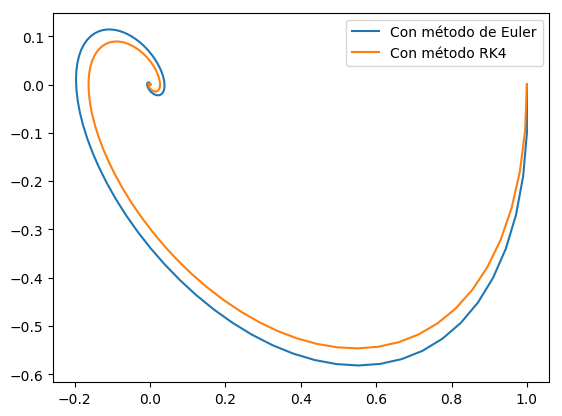

In [15]:
plot(listxEE1,listxEE2,label="Con método de Euler");
plot(listxRK41,listxRK42,label="Con método RK4");
legend()
show();

## Ejercicio 2

Se resuelve el péndulo simple:

$$l\ddot{\theta}=-g\:\mathrm{sen}\:\theta,$$

usando el método RK4 para varias condiciones iniciales ($l=g=1$).

In [16]:
g(x,t)=[x[2],-sin.(x[1])];  # l=g=1.

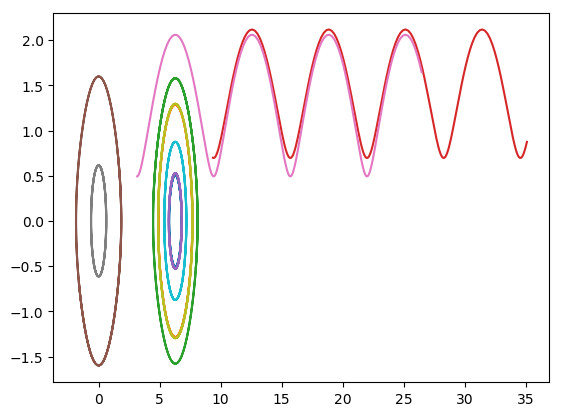

In [17]:
listark=0:0.1:20;
for i in 1:10
    a=10*(2*rand(1)-1)
    b=2*rand(1)-1
    listaxrk=RK_4(g,listark,[abs.(a),abs.(b)]);
    listaxrk1=map(x->x[1],listaxrk);
    listaxrk2=map(x->x[2],listaxrk);
    plot(listaxrk1,listaxrk2)
end

Entonces se tienen dos tipos de curvas, abiertas y cerradas. La ecuación diferencial es equivalente al siguiente sistema:

$$\frac{d\mathbf{\Theta}}{dt}=\boldsymbol{g}(\mathbf{\Theta}),$$

con $\mathbf{\Theta}(t)=(\theta(t),\varphi(t))$ y $\boldsymbol{g}(\mathbf{\Theta})=(\varphi,-\mathrm{sen}\:\theta)$. Los puntos fijos están dados por $\boldsymbol{g}(\mathbf{\Theta})=0$, es decir, en $\varphi=0$ y $\mathrm{sen}\:\theta=0$, ergo los puntos fijos en el espacio fase se encuentran en el eje horizontal donde (en principio) $\mathrm{sen}\:\theta=0$. Recordemos que la fuerza (debida a la gravedad) en el péndulo simple es proporcinal a $-\mathrm{sen}\:\theta$, por lo que la energía potencial es proporcional a $-\cos\theta$, como $\mathrm{sen}\:\theta=0$, entonces la fuerza en los puntos fijos es cero, entonces la energía potencial es mínima o máxima, pero sólo los mínimos son los puntos fijos por la estabilidad. Entonces las curvas se pueden interpretar como sigue:

Las curvas cerradas (que se centran en los puntos fijos, i.e. en donde la energía potencial es mínima) corresponden a energías entre la mínima y antes de la máxima (pero no la máxima energía potencial), entonces el péndulo se queda oscilando con ese rango de energías. Mientras que para energías máximas se forman las curvas abiertas que se extienden, se interpreta esto (matemáticamente) que el péndulo gira llegando a la máxima altura para luego descender y volver a subir y así sucesivamente, físicamente esto es difícil que suceda pero matemáticamente es una solución.

## Ejercicio 3

Se comprueba númericamente que la ecuación diferencial:

$$\frac{dx}{dt}=x^2-1,$$

tiene dos puntos fijos en $x=\pm1$ utilizando el método RK4.

In [18]:
h(x,t)=x.^2-1;

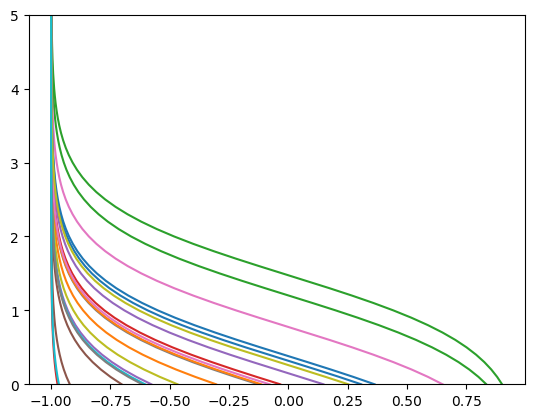

In [19]:
listaRK=0:0.1:20;
for i in 1:20
    CI1=2*rand(1)-1
    listaxRK=RK_4(h,listaRK,CI1);
    plot(listaxRK,listaRK)
    ylim([0,5])
end

De la grafica se observa que los puntos para $x=-1$ o $x=1$ son puntos fijos, y al observar el comportamiento de las soluciones se concluye que el $x=-1$ es un _atractor_ pues las soluciones se pegan/acercan hacia esta parte, mientras que las soluciones se alejan de $x=1$, por lo que este último es un _repulsor_.

## Ejercicio 4

Ahora resolvemos con el método RK4:

$$\frac{dx}{dt}=x^2.$$

In [20]:
F(x,t)=x.^2;

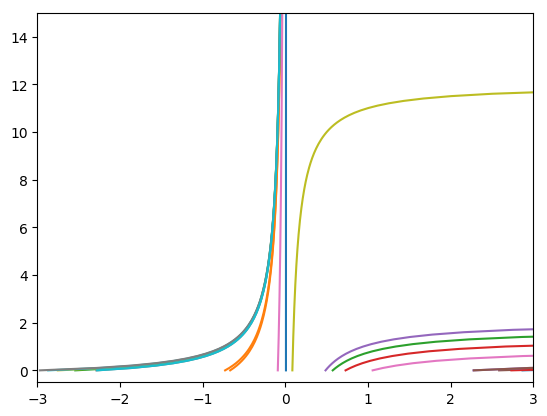

In [21]:
lista_RK=0:0.1:20;
for i in 1:20
    CI2=3*(2*rand(1)-1)
    listax_RK=RK_4(F,lista_RK,CI2);
    plot(listax_RK,lista_RK)
    xlim([-3,3])
    ylim([-0.5,15])
end

Es evidente, tanto de la ecuación diferencial como de la grafica que el único punto fijo es $x=0$, y que es tanto un atractor como un repulsor, atrae a las soluciones cuya condición inicial es negativa y aleja a las soluciones con condición inicial positiva.

## Ejercicio 5

Utilizando el método RK4 se resuelve numéricamente la ecuación diferencial:

$$\frac{d\mathbf{x}}{d t}=\boldsymbol{\mathcal{A}}\mathbf{x},$$

con $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}a & b\\c & d\end{array}\right)$ y $\mathbf{x}(t)=(x(t),y(t))^{\mathrm{T}}$. El único punto fijo de este sistema lineal es $(0,0)$.

In [22]:
G(x,t)=[a*x[1]+b*x[2],c*x[1]+d*x[2]];

* Para $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}1 & 0\\0 & 1\end{array}\right)$:

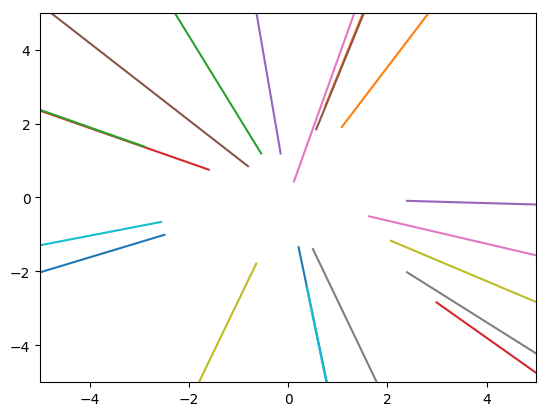

In [23]:
a,b,c,d=1,0,0,1;
lista=0:0.1:20;      # Paso h=0.1
for i in 1:20
    CI3=3*(2*rand(1)-1)
    CI4=3*(2*rand(1)-1)
    vector=RK_4(G,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-5,5])
    ylim([-5,5])
end

En lenguaje de sistemas dinámicos el tipo de punto fijo que presenta la grafica anterior se conoce como punto _estrella_. El anterior es un punto estrella inestable pues las soluciones se alejan del punto fijo.

* Para $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}-1 & 0\\0 & -1\end{array}\right)$:

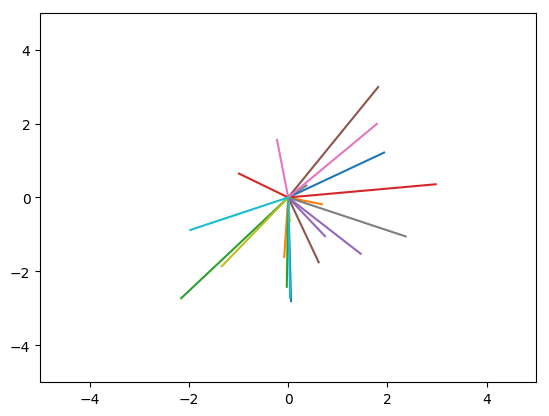

In [24]:
a,b,c,d=-1,0,0,-1;
lista=0:0.1:20;      # Paso h=0.1
for i in 1:20
    CI3=3*(2*rand(1)-1)
    CI4=3*(2*rand(1)-1)
    vector=RK_4(G,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-5,5])
    ylim([-5,5])
end

Se tiene un punto estrella estable.

* Para $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}1 & 0\\0 & -2\end{array}\right)$:

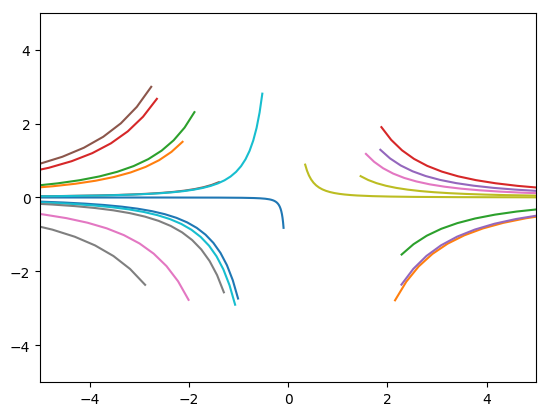

In [25]:
a,b,c,d=1,0,0,-2;
lista=0:0.1:20;      # Paso h=0.1
for i in 1:20
    CI3=3*(2*rand(1)-1)
    CI4=3*(2*rand(1)-1)
    vector=RK_4(G,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-5,5])
    ylim([-5,5])
end

A estos se les llaman puntos sillas, y no son globalmente estables.

* Para $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}1 & 0\\0 & -0.5\end{array}\right)$:

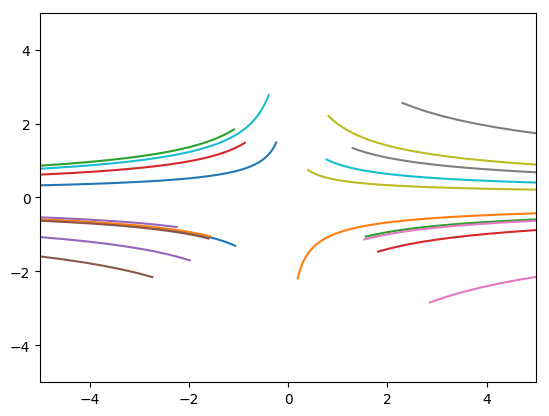

In [26]:
a,b,c,d=1,0,0,-0.5;
lista=0:0.1:20;      # Paso h=0.1
for i in 1:20
    CI3=3*(2*rand(1)-1)
    CI4=3*(2*rand(1)-1)
    vector=RK_4(G,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-5,5])
    ylim([-5,5])
end

Otro punto silla.

* Para $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}0 & 1\\-1 & 0\end{array}\right)$:

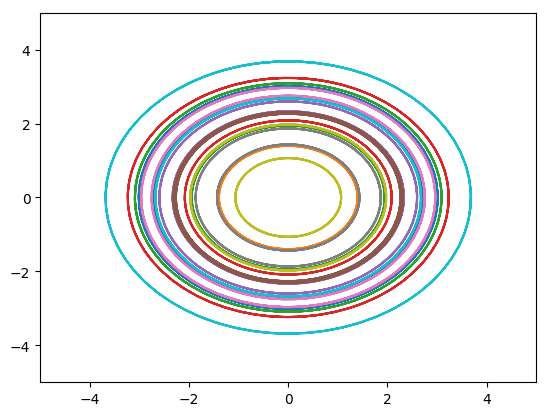

In [27]:
a,b,c,d=0,1,-1,0;
lista=0:0.1:20;      # Paso h=0.1
for i in 1:20
    CI3=3*(2*rand(1)-1)
    CI4=3*(2*rand(1)-1)
    vector=RK_4(G,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-5,5])
    ylim([-5,5])
end

A estos puntos se les llaman puntos fijos y se dice que son neutralmente estables pues dadas unas condiciones iniciales las soluciones ni se alejan ni acercan al punto fijo.

* Para $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}1 & 1\\-1 & 1\end{array}\right)$:

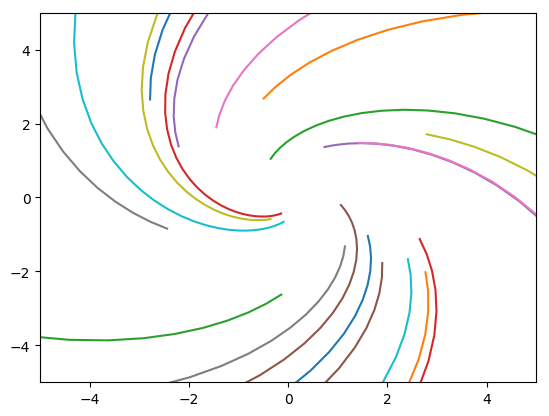

In [28]:
a,b,c,d=1,1,-1,1;
lista=0:0.1:20;      # Paso h=0.1
for i in 1:20
    CI3=3*(2*rand(1)-1)
    CI4=3*(2*rand(1)-1)
    vector=RK_4(G,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-5,5])
    ylim([-5,5])
end

A estos puntos les llaman espirales (estables o inestables), también se les llaman focos. La de arriba es un foco inestable pues las soluciones se alejan del punto fijo.

* Para $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}-1 & 1\\-1 & -1\end{array}\right)$:

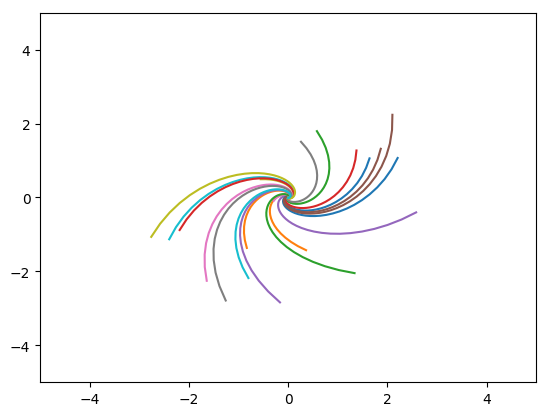

In [29]:
a,b,c,d=-1,1,-1,-1;
lista=0:0.1:20;      # Paso h=0.1
for i in 1:20
    CI3=3*(2*rand(1)-1)
    CI4=3*(2*rand(1)-1)
    vector=RK_4(G,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-5,5])
    ylim([-5,5])
end

Espiral estable.

* Para $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}-1 & -1\\1 & -1\end{array}\right)$:

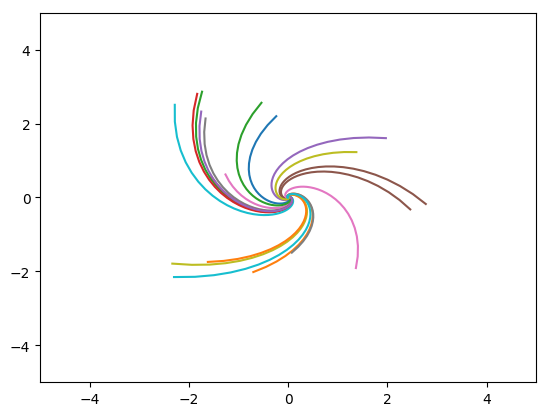

In [30]:
a,b,c,d=-1,-1,1,-1;
lista=0:0.1:20;      # Paso h=0.1
for i in 1:20
    CI3=3*(2*rand(1)-1)
    CI4=3*(2*rand(1)-1)
    vector=RK_4(G,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-5,5])
    ylim([-5,5])
end

Espiral estable, observar que el sentido de giro es contrario al de la anterior.

* Para $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}1 & 4\\-2 & 1\end{array}\right)$:

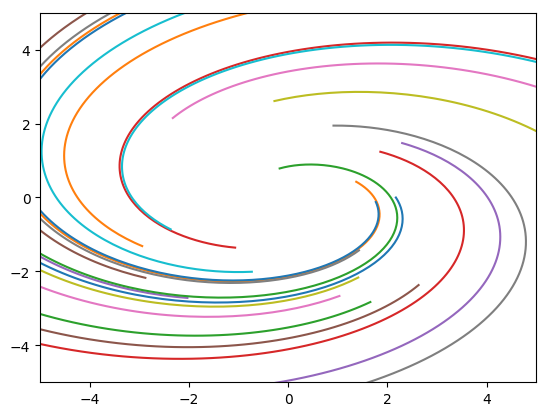

In [31]:
a,b,c,d=1,4,-2,1;
lista=0:0.01:20;      # Paso h=0.01
for i in 1:20
    CI3=3*(2*rand(1)-1)
    CI4=3*(2*rand(1)-1)
    vector=RK_4(G,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-5,5])
    ylim([-5,5])
end

Tenemos un punto espiral inestable.

* Para $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}-1 & -1\\0 & -1\end{array}\right)$:

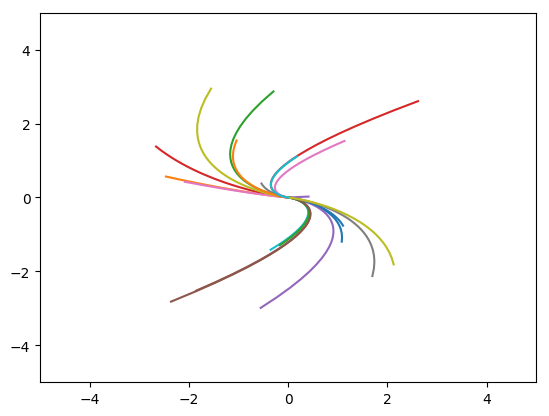

In [32]:
a,b,c,d=-1,-1,0,-1;
lista=0:0.1:20;      # Paso h=0.01
for i in 1:20
    CI3=3*(2*rand(1)-1)
    CI4=3*(2*rand(1)-1)
    vector=RK_4(G,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-5,5])
    ylim([-5,5])
end

A estos puntos fijos se las llama nodo degenerado.

Para el sistema lineal:

$$\frac{d\mathbf{x}}{d t}=\boldsymbol{\mathcal{A}}\mathbf{x},$$

con $\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}a & b\\c & d\end{array}\right)$, su polinomio característico es $p(\lambda)=\lambda^2-\lambda\tau+\Delta$, en donde $\tau=\mathrm{tr}(A)$ y $\Delta=\mathrm{det}(A)$, así que:

$$\lambda_{\pm}=\frac{\tau\pm\sqrt{\tau^{2}-4\Delta}}{2}$$

El comportamiento de los puntos fijos se puede clasificar como sigue:

![](images/fixed_points_space.png)

Donde dice "non-isolated fixed points" se refiere a que los puntos fijos se extienden en realidad a un eje que es atractor, repulsor o ambos.

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>